# This file contains finding root for non-linear eqn by:

1.   Bisection Method
2.   Regula-Falsi Method
3.   Secant Method
4.   Newton-Raphson Method



# Bisection Method

Enter the equation in python syntax: exp(x)+x-2
Enter the first initial guess: 0
Enter the second initial guess: 1
Enter the tolerable error: 0.001
Enter the maximum number of iterations: 100
Iteration 1: a = 0.00000, b = 1.00000, c = 0.50000, f(c) = 0.14872
Iteration 2: a = 0.00000, b = 0.50000, c = 0.25000, f(c) = -0.46597
Iteration 3: a = 0.25000, b = 0.50000, c = 0.37500, f(c) = -0.17001
Iteration 4: a = 0.37500, b = 0.50000, c = 0.43750, f(c) = -0.01367
Iteration 5: a = 0.43750, b = 0.50000, c = 0.46875, f(c) = 0.06675
Iteration 6: a = 0.43750, b = 0.46875, c = 0.45312, f(c) = 0.02635
Iteration 7: a = 0.43750, b = 0.45312, c = 0.44531, f(c) = 0.00629
Iteration 8: a = 0.43750, b = 0.44531, c = 0.44141, f(c) = -0.00370
Iteration 9: a = 0.44141, b = 0.44531, c = 0.44336, f(c) = 0.00129
Iteration 10: a = 0.44141, b = 0.44336, c = 0.44238, f(c) = -0.00121

✅ Approximate root = 0.44287 found in 10 iterations (tolerance: 0.001)


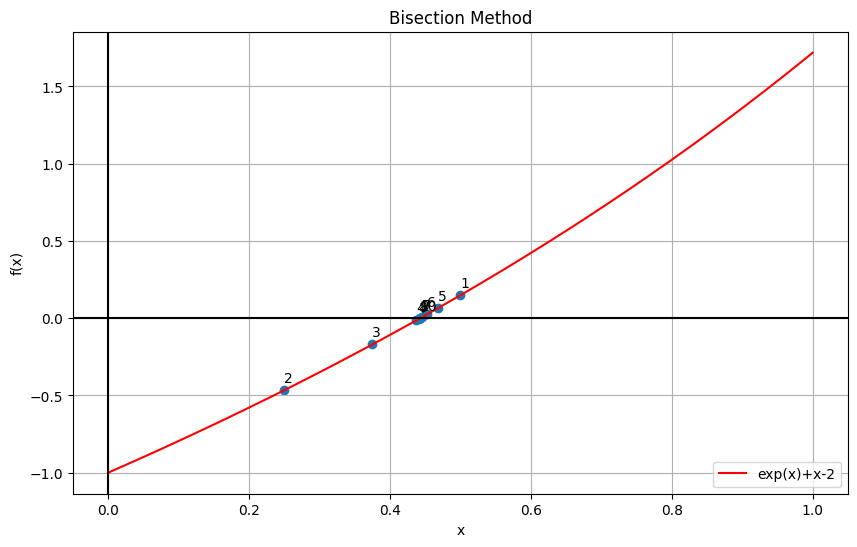

In [ ]:
# Bisection method (cleaned up version)
import math
import numpy as np

eqn = input("Enter the equation in python syntax: ")

def F(x, eqn):
    return eval(eqn, {"x": x, "exp": np.exp})

def f(x):
    return F(x, eqn)

a = float(input("Enter the first initial guess: "))
b = float(input("Enter the second initial guess: "))
m = []

if f(a) * f(b) > 0:
    print(f"No root lies in the interval ({a}, {b})")

else:
    e = float(input("Enter the tolerable error: "))
    N = int(input("Enter the maximum number of iterations: "))
    i = 1

    while i <= N:
        c = (a + b) / 2
        m.append(c)
        fc = f(c)

        print(f"Iteration {i}: a = {a:.5f}, b = {b:.5f}, c = {c:.5f}, f(c) = {fc:.5f}")

        if f(a) * fc < 0:
            b = c
        else:
            a = c

        error = abs(b - a)
        if error < e:
            print(f"\n✅ Approximate root = {(a + b)/2:.5f} found in {i} iterations (tolerance: {e})")
            break

        i += 1

    if i > N:
        print(f"\n❌ Maximum iterations ({N}) reached. Solution may not have converged.")


import numpy as np
import matplotlib.pyplot as plt

# The 'm' list should already be populated from your bisection method logic.
# Ensure 'a' and 'b' are also defined from previous steps.

# Convert m to a NumPy array here, if it's still a list from the bisection loop.
# This should be the only 'm = np.array(m)' line in this block.
m = np.array(m)            #converts the variable m (a list) into a NumPy array.




x = np.linspace(0, 1, 1000)     #creates a numpy array "x" with 1000 values (0.001.......0.999). We put 1000 as our tolorable error is 0.001

plt.figure(figsize=(10, 6))
plt.plot(x, f(x), color='red', label=eqn)      #Plots the graph of the function f(x) against the values in the array x.
#label=eqn is for the legend() below
plt.axhline(0, color='black') # Simplified from (0,0)
plt.axvline(0, color='black') # Simplified from (0,0)
plt.legend()        #used to show that small box on the bottom right corner
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.title('Bisection Method')
plt.scatter(m, f(m))

for i, val in enumerate(m):                        #index ->> i
    plt.text(val, f(val) + 0.05, f'{i+1}')          #(x-axis, y-axis, which number to display)

plt.show()

# Regula-Falsi (False position) method

Enter the equation in python syntax (use 'x' as variable): exp(x)+x-2
Enter the first initial guess (a): 0
Enter the second initial guess (b): 1
Enter the tolerable error: 0.001
Enter the maximum number of iterations: 100

Iteration  a            b            f(a)         f(b)         c           
----------------------------------------------------------------------
1          0.00000      1.00000      -1.00000     1.71828      0.36788     
2          0.36788      1.00000      -0.18745     1.71828      0.43006     
3          0.43006      1.00000      -0.03260     1.71828      0.44067     
4          0.44067      1.00000      -0.00559     1.71828      0.44248     

✅ Approximate root = 0.44248 found in 4 iterations (tolerance: 0.001)


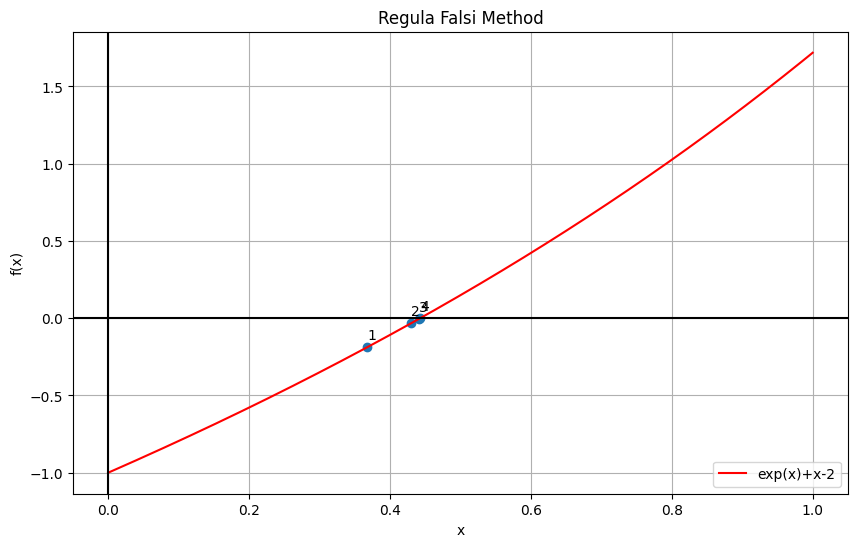

In [ ]:
import math  # Needed for math functions like sin, exp, etc.
import numpy as np

# Input the equation
eqn = input("Enter the equation in python syntax (use 'x' as variable): ")

# Function to evaluate f(x)
def F(x, eqn):
    return eval(eqn, {"x": x, "exp": np.exp})

def f(x):
    return F(x, eqn)

# Initial guesses
a = float(input("Enter the first initial guess (a): "))
b = float(input("Enter the second initial guess (b): "))
n = []

# Check if root exists in interval
if f(a) * f(b) > 0:
    print(f"❌ No root lies in the interval ({a}, {b})")
else:
    e = float(input("Enter the tolerable error: "))
    N = int(input("Enter the maximum number of iterations: "))

    print("\n{:<10} {:<12} {:<12} {:<12} {:<12} {:<12}".format(
      "Iteration", "a", "b", "f(a)", "f(b)", "c"))
    print("-" * 70)

    i = 1
    while i <= N:
        fa = f(a)
        fb = f(b)
        c = (a * fb - b * fa) / (fb - fa)
        n.append(c)
        fc = f(c)

        print("{:<10} {:<12.5f} {:<12.5f} {:<12.5f} {:<12.5f} {:<12.5f}".format(
            i, a, b, fa, fb, c))

        if abs(fc) < e:
            print(f"\n✅ Approximate root = {c:.5f} found in {i} iterations (tolerance: {e})")
            break

        if fa * fc < 0:
            b = c
        else:
            a = c

        i += 1

    if i > N:
        print(f"\n❌ Maximum iterations ({N}) reached. Solution may not have converged.")
import numpy as np
import matplotlib.pyplot as plt

# The 'n' list should already be populated from your Regula Falsi method logic.
# Ensure 'a' and 'b' are also defined from previous steps.

# Convert n to a NumPy array here, if it's still a list from the Regula Falsi loop.
# This should be the only 'n = np.array(n)' line in this block.

n = np.array(n)

x = np.linspace(0, 1, 1000)
plt.figure(figsize=(10, 6))
plt.plot(x, f(x), color='red', label=eqn)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.title('Regula Falsi Method')  # Changed title to Regula Falsi
if n.size > 0: # Only attempt to scatter plot if 'n' has data
    plt.scatter(n, f(n)) # Removed color and zorder for simplicity
    for i, val in enumerate(n):
        plt.text(val, f(val) + 0.05, f'{i+1}') # Fixed offset, no bbox or dynamic calculation

plt.show()

# Secant Method

Enter the equation (use numpy functions like exp(x), sin(x)): exp(x)+x-2
Enter the first guess: 0
Enter the second guess: 1
Enter the error tolerance: 0.001
Enter the number of iterations: 100
 itr        a        b        c      f(a)      f(b)      f(c)
   1 0.000000 1.000000 0.367879 -1.000000  1.718282 -0.187453
   2 1.000000 0.367879 0.430056  1.718282 -0.187453 -0.032599
   3 0.367879 0.430056 0.443146 -0.187453 -0.032599  0.000745
The root of the equation is: 0.4431457539835316 in 3 iterations


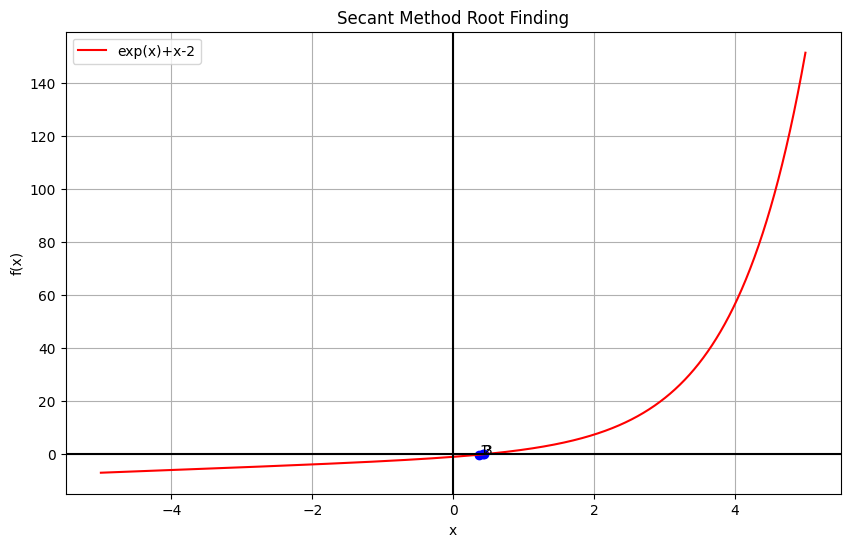

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Input the equation: use numpy functions like exp(x), sin(x), etc.
eqn = input("Enter the equation (use numpy functions like exp(x), sin(x)): ")

# Define f(x) to support both scalar and numpy array inputs using numpy functions
def f(x):

        #'sin': np.sin,
        #'cos': np.cos,
        #'log': np.log,
       # 'sqrt': np.sqrt,
        # add more numpy functions if needed

    return eval(eqn, {
        'x': x,
        'exp': np.exp,})

# Get initial guesses
a = float(input("Enter the first guess: "))
b = float(input("Enter the second guess: "))

A = []  # to store iteration info
m = []  # to store roots approximations

if f(a) == f(b):
    print("Value becomes infinite. Choose another guess.")
else:
    e = float(input("Enter the error tolerance: "))
    N = int(input("Enter the number of iterations: "))
    itr = 1
    while itr <= N:
        fa = f(a)
        fb = f(b)
        c = (a * fb - b * fa) / (fb - fa)
        fc = f(c)
        m.append(c)
        A.append([itr, a, b, c, fa, fb, fc])
        err = abs(fc)
        if err < e:
            df = pd.DataFrame(A, columns=['itr', 'a', 'b', 'c', 'f(a)', 'f(b)', 'f(c)'])
            print(df.to_string(index=False))
            print(f"The root of the equation is: {c} in {itr} iterations")
            break
        a, b = b, c
        itr += 1
    if itr > N:
        print("Root did not converge in the given iterations")

# Plotting
m = np.array(m)

x = np.linspace(-5, +5, 2000)  # Range centered around root guesses

plt.figure(figsize=(10, 6))
plt.plot(x, f(x), label=eqn, color='red')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Secant Method Root Finding')
plt.grid(True)
plt.legend()

plt.scatter(m, f(m), color='blue')

for i, val in enumerate(m):
    plt.text(val, f(val) + 0.05, f'{i+1}')  # slightly above each point

plt.show()


# Newton Raphson Method

Enter the equation (use numpy functions like exp(x), sin(x)): exp(x)+x-2
Enter the initial guess: 0
Enter the error tolerance: 0.001
Enter the maximum number of iterations: 100
 Iteration        a      f(a)     g(a)        b
         1 0.000000 -1.000000 2.000000 0.500000
         2 0.500000  0.148721 2.648721 0.443852
         3 0.443852  0.002551 2.558700 0.442855

The root of the equation is approximately: 0.4428547040825779 in 3 iterations


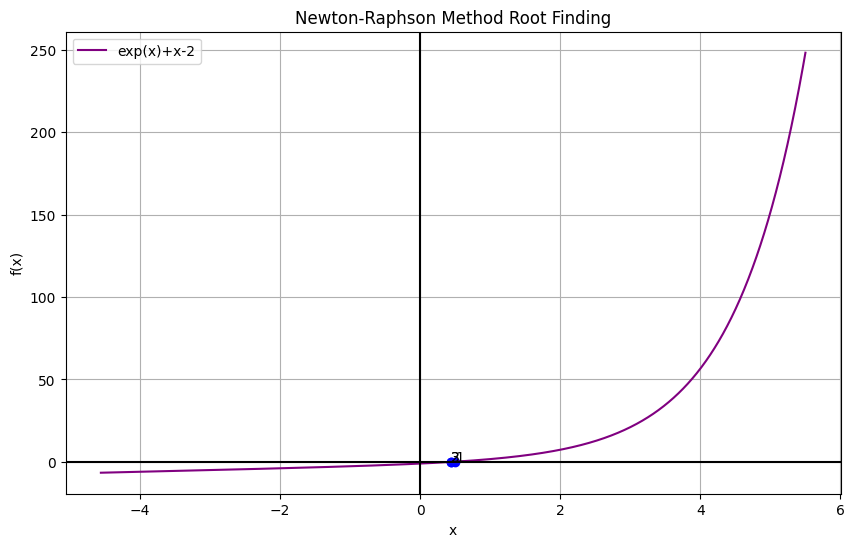

In [ ]:
#NEWTON RAPHSON METHOD
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Input equation using numpy syntax (e.g. exp(x), sin(x))
eqn = input("Enter the equation (use numpy functions like exp(x), sin(x)): ")

# Function to evaluate f(x) safely with numpy functions
def f(x):

        #'sin': np.sin,
        #'cos': np.cos,
        #'log': np.log,
       # 'sqrt': np.sqrt,
        # add more numpy functions if needed

    return eval(eqn, {
        'x': x,
        'exp': np.exp,})

# Numerical derivative (central difference)
def g(f, x, h=1e-10):
    return (f(x + h) - f(x - h)) / (2 * h)

A = []  # to store iteration data
m = []  # to store root approximations for plotting

a = float(input("Enter the initial guess: "))

if g(f, a) == 0:
    print("First derivative of the function at initial guess is zero. Try a different guess.")
else:
    e = float(input("Enter the error tolerance: "))
    N = int(input("Enter the maximum number of iterations: "))
    itr = 1
    while itr <= N:
        fa = f(a)
        ga = g(f, a)
        if ga == 0:
            print("Zero derivative encountered during iterations. Stopping.")
            break
        b = a - fa / ga
        A.append([itr, a, fa, ga, b])
        m.append(b)
        err = abs(f(b))

        if err < e:
            df = pd.DataFrame(A, columns=['Iteration', 'a', 'f(a)', "g(a)", 'b'])
            print( df.to_string(index=False))
            print(f"\nThe root of the equation is approximately: {b} in {itr} iterations")
            break
        a = b
        itr += 1
    else:
        print("Root did not converge within the given iterations.")

# Plotting
m = np.array(m)

x = np.linspace(min(m) - 5, max(m) + 5, 2000)

plt.figure(figsize=(10, 6))
plt.plot(x, f(x), label=eqn, color='purple')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Newton-Raphson Method Root Finding')
plt.grid(True)
plt.legend()

plt.scatter(m, f(m), color='blue')

for i, val in enumerate(m):
    plt.text(val, f(val) + 0.05, f'{i+1}')

plt.show()

